<a href="https://colab.research.google.com/github/mattia-robbiano/graph_maker/blob/main/quantum_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
from google.colab import auth
import matplotlib.pyplot as plt
import pandas as pd
import gspread
from google.auth import default
import networkx as nx
import numpy as np

In [156]:
#Read google spreadsheet
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open('quantum_graph').sheet1

In [ ]:
# Get all values from the worksheet
data = worksheet.get_all_values()

# Convert data to a pandas DataFrame
df = pd.DataFrame(data[1:], columns=data[0])  # Assuming the first row contains column headers

print(df)

<ipython-input-181-0b192060ae0d>:17: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


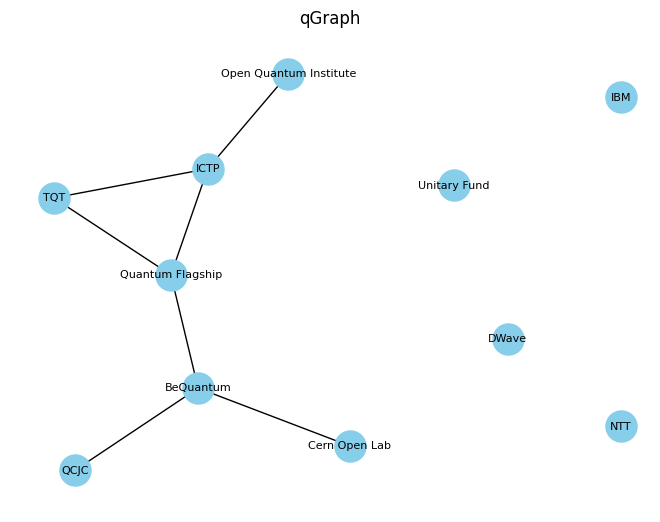

In [181]:
G = nx.Graph()
# Iterate through each row in the DataFrame
for idx, row in df.iterrows():
    source = row['VERTEX']
    targets = row[['TARGET1', 'TARGET2', 'TARGET3', 'TARGET4']].tolist()
    location = row['LOCATION']

    #Add node
    G.add_node(source)

    # Add edges between the source and target nodes (excluding 'None' and self-loops)
    for target in targets:
        if target != source and target != 'None':
            G.add_edge(source, target)

# Draw the graph with specified node colors
pos = nx.nx_pydot.graphviz_layout(G)
nx.draw(G,pos, with_labels=True, node_size=500, font_size=8, node_color='skyblue')

plt.title('qGraph')
plt.show()